In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleepy-driver-eeg-brainwave-data/acquiredDataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/sleepy-driver-eeg-brainwave-data/acquiredDataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB


In [3]:
#check null values
df.isnull().sum()

attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64

In [5]:
df.head()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,0
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,0
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,0
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,0
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

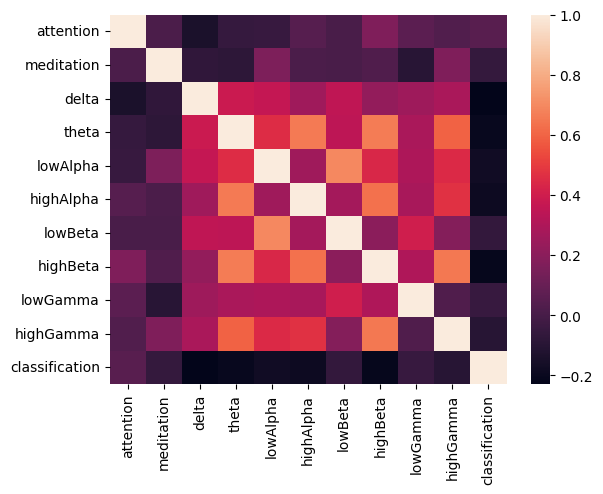

In [7]:
sns.heatmap(df.corr())

**Trying to find correlated features with higher values then, Manupulatiogn them.**

In [8]:
df.corr()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
attention,1.000000,0.012465,-0.142241,-0.053082,-0.051414,0.047367,0.006725,0.166178,0.059002,0.032169,0.049283
meditation,0.012465,1.000000,-0.075071,-0.081029,0.159976,0.015013,0.009094,0.027394,-0.097699,0.166853,-0.057642
delta,-0.142241,-0.075071,1.000000,0.380921,0.363079,0.257987,0.349557,0.225820,0.253741,0.287873,-0.229921
theta,-0.053082,-0.081029,0.380921,1.000000,0.456296,0.656068,0.344237,0.663608,0.285673,0.594448,-0.205588
lowAlpha,-0.051414,0.159976,0.363079,0.456296,1.000000,0.256059,0.693183,0.437718,0.294094,0.444335,-0.174786
highAlpha,0.047367,0.015013,0.257987,0.656068,0.256059,1.000000,0.271657,0.632582,0.281427,0.469033,-0.190926
lowBeta,0.006725,0.009094,0.349557,0.344237,0.693183,0.271657,1.000000,0.199992,0.403545,0.182727,-0.063340
highBeta,0.166178,0.027394,0.225820,0.663608,0.437718,0.632582,0.199992,1.000000,0.301577,0.650842,-0.213560
lowGamma,0.059002,-0.097699,0.253741,0.285673,0.294094,0.281427,0.403545,0.301577,1.000000,0.027007,-0.049076
highGamma,0.032169,0.166853,0.287873,0.594448,0.444335,0.469033,0.182727,0.650842,0.027007,1.000000,-0.103819


In [50]:
df.describe()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
count,3735.000000,3735.000000,3.735000e+03,3.735000e+03,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3.735000e+03,3735.00000
mean,48.214726,56.577510,5.187714e+05,1.362420e+05,33413.343775,30580.759036,25640.069076,23276.979384,8117.130388,2.087258e+05,0.42838
std,21.876949,19.066577,5.997837e+05,2.175501e+05,51970.930842,52681.858764,37159.039642,43921.116122,15522.904383,3.297073e+05,0.49491
min,1.000000,1.000000,2.160000e+02,1.380000e+02,32.000000,9.000000,2.000000,3.000000,6.000000,4.700000e+01,0.00000
25%,35.000000,43.000000,7.199650e+04,2.347200e+04,7402.000000,6908.500000,6240.000000,4862.000000,2247.000000,5.683000e+03,0.00000
50%,48.000000,56.000000,2.773820e+05,5.797200e+04,16481.000000,14928.000000,13841.000000,9739.000000,4440.000000,5.719800e+04,0.00000
75%,63.000000,69.000000,7.780680e+05,1.514855e+05,37721.500000,33147.500000,30236.000000,20796.500000,8813.000000,2.576875e+05,1.00000
max,100.000000,100.000000,3.598743e+06,3.194358e+06,699008.000000,785947.000000,595549.000000,443589.000000,289281.000000,2.328370e+06,1.00000


In [15]:
c = df.corr().abs()

In [17]:
s = c.unstack()

In [18]:
so = s.sort_values(kind="quicksort")

In [24]:
so.argmax()

110

In [43]:
high_corr = []

In [44]:
for index, value in so.items():
    if value > 0.5:
        if index[0] == index[1]:
            pass
        else:
            print(f"{index[0]} , {index[1]} = {value}")
            high_corr.append([index[0],index[1],value])

highGamma , theta = 0.5944483213520594
theta , highGamma = 0.5944483213520594
highBeta , highAlpha = 0.6325824476349494
highAlpha , highBeta = 0.6325824476349494
highGamma , highBeta = 0.6508421360201823
highBeta , highGamma = 0.6508421360201823
highAlpha , theta = 0.6560677381773837
theta , highAlpha = 0.6560677381773837
highBeta , theta = 0.6636077468052477
theta , highBeta = 0.6636077468052477
lowBeta , lowAlpha = 0.6931826381686352
lowAlpha , lowBeta = 0.6931826381686352


In [45]:
high_corr

[['highGamma', 'theta', 0.5944483213520594],
 ['theta', 'highGamma', 0.5944483213520594],
 ['highBeta', 'highAlpha', 0.6325824476349494],
 ['highAlpha', 'highBeta', 0.6325824476349494],
 ['highGamma', 'highBeta', 0.6508421360201823],
 ['highBeta', 'highGamma', 0.6508421360201823],
 ['highAlpha', 'theta', 0.6560677381773837],
 ['theta', 'highAlpha', 0.6560677381773837],
 ['highBeta', 'theta', 0.6636077468052477],
 ['theta', 'highBeta', 0.6636077468052477],
 ['lowBeta', 'lowAlpha', 0.6931826381686352],
 ['lowAlpha', 'lowBeta', 0.6931826381686352]]

**Defining a self-made factor for them**

In [46]:
scored_corr = []
for item in high_corr:
    score = item[2] / 0.7
    item.append(score)
    scored_corr.append(item)

In [47]:
scored_corr

[['highGamma', 'theta', 0.5944483213520594, 0.8492118876457991],
 ['theta', 'highGamma', 0.5944483213520594, 0.8492118876457991],
 ['highBeta', 'highAlpha', 0.6325824476349494, 0.9036892109070707],
 ['highAlpha', 'highBeta', 0.6325824476349494, 0.9036892109070707],
 ['highGamma', 'highBeta', 0.6508421360201823, 0.9297744800288319],
 ['highBeta', 'highGamma', 0.6508421360201823, 0.9297744800288319],
 ['highAlpha', 'theta', 0.6560677381773837, 0.9372396259676911],
 ['theta', 'highAlpha', 0.6560677381773837, 0.9372396259676911],
 ['highBeta', 'theta', 0.6636077468052477, 0.9480110668646397],
 ['theta', 'highBeta', 0.6636077468052477, 0.9480110668646397],
 ['lowBeta', 'lowAlpha', 0.6931826381686352, 0.9902609116694789],
 ['lowAlpha', 'lowBeta', 0.6931826381686352, 0.9902609116694789]]

In [48]:
cols = df.columns
cols

Index(['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha',
       'lowBeta', 'highBeta', 'lowGamma', 'highGamma', 'classification'],
      dtype='object')

In [53]:
y = df['classification']

In [57]:
df.head(5)

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,0
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,0
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,0
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,0
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,0


In [115]:
x = df.drop(columns = ['classification'])

In [116]:
x.head(5)

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471


In [117]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
len(cols)

11

In [119]:
x.head(5)

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471


Making Engineered Features

In [120]:
x.shape

(3735, 10)

In [93]:
ncols = cols[:10]

In [94]:
ncols

Index(['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha',
       'lowBeta', 'highBeta', 'lowGamma', 'highGamma'],
      dtype='object')

Multiply interest rate

In [121]:
m = x.shape[1]
for i in range(0,m):
    for j in range(1,m):
        if x.columns[i] == scored_corr[j][0] and x.columns[j] == scored_corr[j][1]:
            x[f'{x.columns[i]}_x_{x.columns[j]}'] =  x[x.columns[i]] * x[x.columns[j]] * scored_corr[j][3]
        
        else:
            x[f'{x.columns[i]}_x_{x.columns[j]}'] =  x[x.columns[i]] * x[x.columns[j]]

In [122]:
x

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,...,lowGamma_x_highGamma,highGamma_x_meditation,highGamma_x_delta,highGamma_x_theta,highGamma_x_lowAlpha,highGamma_x_highAlpha,highGamma_x_lowBeta,highGamma_x_highBeta,highGamma_x_lowGamma,highGamma_x_highGamma
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,...,24485058,91222,2576919546,743673940,71300725,73396148,71300725,35029248,24485058,7198489
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,...,24875750,256500,185938750,134068750,95817000,187867250,95817000,47181750,24875750,22562500
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,...,8176265,156048,245157910,140261144,27961851,44096564,27961851,37916413,8176265,10569001
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,...,32193700,132775,45361025,116421075,7158550,96767550,7158550,78147975,32193700,7980625
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,...,28985358,366557,56373184,258444569,181407418,259046379,181407418,89330488,28985358,29931841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,40,50,148894,18262,9963,1701,9963,2889,1319,498,...,656862,24900,74149212,9094476,4961574,847098,4961574,1438722,656862,248004
3731,21,48,254724,76658,19773,15432,19773,5208,5047,4062,...,20500914,194976,1034688888,311384796,80317926,62684784,80317926,21154896,20500914,16499844
3732,16,64,534312,78775,68120,15326,68120,7347,3183,1314,...,4182462,84096,702085968,103510350,89509680,20138364,89509680,9653958,4182462,1726596
3733,10,63,427017,262229,62326,49406,62326,19779,12966,4820,...,62496120,303660,2058221940,1263943780,300411320,238136920,300411320,95334780,62496120,23232400


In [123]:
columns = x.columns
columns

Index(['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha',
       'lowBeta', 'highBeta', 'lowGamma', 'highGamma',
       'attention_x_meditation', 'attention_x_delta', 'attention_x_theta',
       'attention_x_lowAlpha', 'attention_x_highAlpha', 'attention_x_lowBeta',
       'attention_x_highBeta', 'attention_x_lowGamma', 'attention_x_highGamma',
       'meditation_x_meditation', 'meditation_x_delta', 'meditation_x_theta',
       'meditation_x_lowAlpha', 'meditation_x_highAlpha',
       'meditation_x_lowBeta', 'meditation_x_highBeta',
       'meditation_x_lowGamma', 'meditation_x_highGamma', 'delta_x_meditation',
       'delta_x_delta', 'delta_x_theta', 'delta_x_lowAlpha',
       'delta_x_highAlpha', 'delta_x_lowBeta', 'delta_x_highBeta',
       'delta_x_lowGamma', 'delta_x_highGamma', 'theta_x_meditation',
       'theta_x_delta', 'theta_x_theta', 'theta_x_lowAlpha',
       'theta_x_highAlpha', 'theta_x_lowBeta', 'theta_x_highBeta',
       'theta_x_lowGamma', 'theta_x_

In [129]:
scaler = MinMaxScaler()
# scaled = scaler.fit_transform(x, axis=1)

In [125]:
scaled.shape

(3735, 100)

In [126]:
scaled = pd.DataFrame(x, columns=[columns])

In [127]:
scaled.head(5)

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,...,lowGamma_x_highGamma,highGamma_x_meditation,highGamma_x_delta,highGamma_x_theta,highGamma_x_lowAlpha,highGamma_x_highAlpha,highGamma_x_lowBeta,highGamma_x_highBeta,highGamma_x_lowGamma,highGamma_x_highGamma
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
x.shape

(3735, 100)

In [142]:
for item in x.columns:
    print(item)
    x[f'{item}'] = x[f'{item}']/np.max(x[f'{item}'])

attention
meditation
delta
theta
lowAlpha
highAlpha
lowBeta
highBeta
lowGamma
highGamma
attention_x_meditation
attention_x_delta
attention_x_theta
attention_x_lowAlpha
attention_x_highAlpha
attention_x_lowBeta
attention_x_highBeta
attention_x_lowGamma
attention_x_highGamma
meditation_x_meditation
meditation_x_delta
meditation_x_theta
meditation_x_lowAlpha
meditation_x_highAlpha
meditation_x_lowBeta
meditation_x_highBeta
meditation_x_lowGamma
meditation_x_highGamma
delta_x_meditation
delta_x_delta
delta_x_theta
delta_x_lowAlpha
delta_x_highAlpha
delta_x_lowBeta
delta_x_highBeta
delta_x_lowGamma
delta_x_highGamma
theta_x_meditation
theta_x_delta
theta_x_theta
theta_x_lowAlpha
theta_x_highAlpha
theta_x_lowBeta
theta_x_highBeta
theta_x_lowGamma
theta_x_highGamma
lowAlpha_x_meditation
lowAlpha_x_delta
lowAlpha_x_theta
lowAlpha_x_lowAlpha
lowAlpha_x_highAlpha
lowAlpha_x_lowBeta
lowAlpha_x_highBeta
lowAlpha_x_lowGamma
lowAlpha_x_highGamma
highAlpha_x_meditation
highAlpha_x_delta
highAlpha_x_t

In [143]:
x.head()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,...,lowGamma_x_highGamma,highGamma_x_meditation,highGamma_x_delta,highGamma_x_theta,highGamma_x_lowAlpha,highGamma_x_highAlpha,highGamma_x_lowBeta,highGamma_x_highBeta,highGamma_x_lowGamma,highGamma_x_highGamma
0,0.26,0.34,0.266888,0.086772,0.038018,0.034806,0.044623,0.029433,0.031547,0.001152,...,0.000183,0.000392,0.000453,0.000148,0.000050,0.000059,0.000097,0.000051,0.000183,0.000001
1,0.29,0.54,0.010877,0.008836,0.028858,0.050323,0.033871,0.022392,0.018104,0.002040,...,0.000186,0.001102,0.000033,0.000027,0.000068,0.000152,0.000131,0.000068,0.000186,0.000004
2,0.40,0.48,0.020955,0.013506,0.012305,0.017258,0.014442,0.026292,0.008694,0.001396,...,0.000061,0.000670,0.000043,0.000028,0.000020,0.000036,0.000038,0.000055,0.000061,0.000002
3,0.66,0.47,0.004462,0.012901,0.003625,0.043583,0.004255,0.062362,0.039394,0.001213,...,0.000241,0.000570,0.000008,0.000023,0.000005,0.000078,0.000010,0.000113,0.000241,0.000001
4,0.81,0.67,0.002863,0.014788,0.047436,0.060245,0.055676,0.036809,0.018314,0.002350,...,0.000217,0.001574,0.000010,0.000051,0.000128,0.000209,0.000248,0.000129,0.000217,0.000006


## Split Data

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train

In [185]:
import tensorflow as tf
from tensorflow.keras.layers import Dense 
from tensorflow.keras import Sequential, Input

In [186]:
model = Sequential([
    Input(shape=(100,)),
    Dense(16, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [187]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-7), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [188]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                1616      
                                                                 
 dense_13 (Dense)            (None, 4)                 68        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,689
Trainable params: 1,689
Non-trainable params: 0
_________________________________________________________________


In [189]:
history = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
94/94 [==============================] - 1s 1ms/step - loss: 0.6778 - accuracy: 0.5971
Epoch 2/500
94/94 [==============================] - 0s 1ms/step - loss: 0.6398 - accuracy: 0.6218
Epoch 3/500
94/94 [==============================] - 0s 1ms/step - loss: 0.6229 - accuracy: 0.6486
Epoch 4/500
94/94 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.6703
Epoch 5/500
94/94 [==============================] - 0s 1ms/step - loss: 0.6002 - accuracy: 0.6760
Epoch 6/500
94/94 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.6857
Epoch 7/500
94/94 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.6901
Epoch 8/500
94/94 [==============================] - 0s 1ms/step - loss: 0.5804 - accuracy: 0.6951
Epoch 9/500
94/94 [==============================] - 0s 1ms/step - loss: 0.5769 - accuracy: 0.6985
Epoch 10/500
94/94 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.6954
Epoch 11/

In [190]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.7590


[0.6928595900535583, 0.759036123752594]

Text(0.5, 1.0, 'Accuracy')

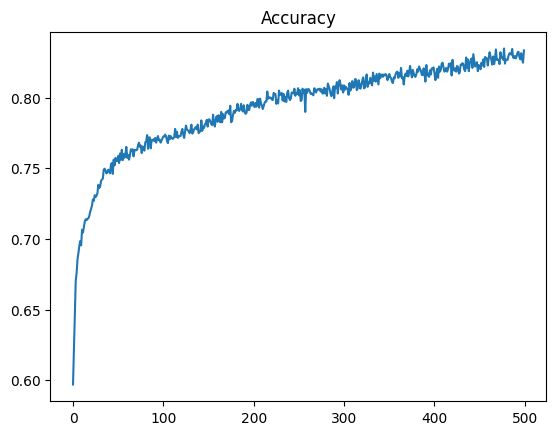

In [192]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

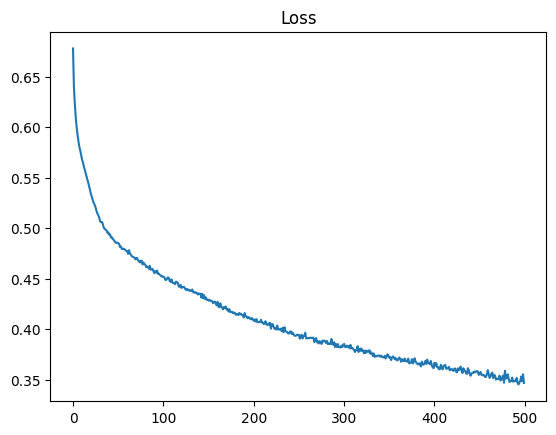

In [193]:
plt.plot(history.history['loss'])
plt.title('Loss')